# Weekly Project 8
This weeks weekly project is a continuation of last weeks exercises.

You are to make a handwritten number classifier. Where we will be using the [mnist dataset](https://en.wikipedia.org/wiki/MNIST_database).

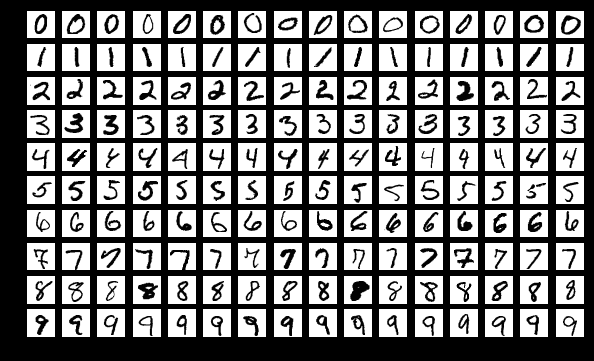

**Create a program that given an image from the mnist dataset.**
- You are free to use any algorithm you want to achieve this.
- It should be able to given a number classify what number it is.
- Accuracy should at least be 80%.

If you decide to use a svm make sure you also use dimensionality reduction. SVM of the full mnist dataset will take around 4-8 hours depending on your pc.

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets, svm, metrics
from sklearn.datasets import fetch_openml

import ssl

Getting the dataset

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context
mnist = fetch_openml('mnist_784', version=1)

images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()

print(images.shape)
print(targets.shape)

(70000, 784)
(70000,)


Showing a sample of images

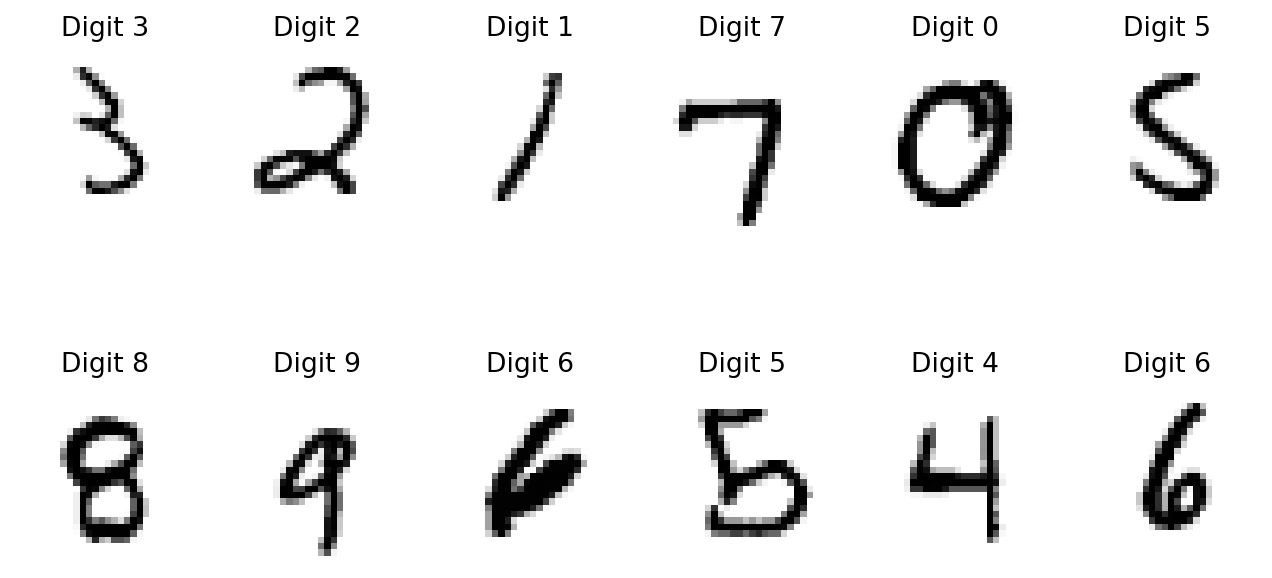

In [3]:
def show_some_digits(images, targets, sample_size=24, title_text='Digit {}' ):
    '''
    Visualize random digits in a grid plot
    images - array of flatten digits [:,784]
    targets - final labels
    '''
    nsamples=sample_size
    rand_idx = np.random.choice(images.shape[0], nsamples)
    images_and_labels = list(zip(images[rand_idx], targets[rand_idx]))


    img = plt.figure(1, figsize=(10, 5), dpi=160)
    for index, (image, label) in enumerate(images_and_labels):
        plt.subplot(math.ceil(nsamples/6.0), 6, index + 1)
        plt.axis('off')
        #each image is flat, we have to reshape to 2D array 28x28-784
        plt.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(title_text.format(label))
    plt.show()

# draw 12 images along with their labels
show_some_digits(images, targets, 12)

Reducing the dimension

In [4]:
pca = PCA(n_components=0.95, svd_solver='full', random_state=42)
principalComponents = pca.fit_transform(images)

print(f"Original shape: {images.shape}")
print(f"Reduced shape: {principalComponents.shape}")
print(f"Components retained: {pca.n_components_}")
print(f"Explained variance ratio sum: {pca.explained_variance_ratio_.sum():.4f}")

Original shape: (70000, 784)
Reduced shape: (70000, 154)
Components retained: 154
Explained variance ratio sum: 0.9503


Training the data

In [5]:
scaler = StandardScaler().fit(principalComponents)
X = scaler.transform(principalComponents)
X_train, X_test, y_train, y_test = train_test_split(X, targets, test_size = int(targets.shape[0] * 0.2))

clf = sk.svm.LinearSVC(penalty='l2', loss='squared_hinge', random_state=0, max_iter=int(10e4))
clf.fit(X_train, y_train)

print(f"Training score: {clf.score(X_train, y_train)}")
print(f"Test score: {clf.score(X_test, y_test)}")

Training score: 0.9143571428571429
Test score: 0.913


Testing the outcome of the trained dataset

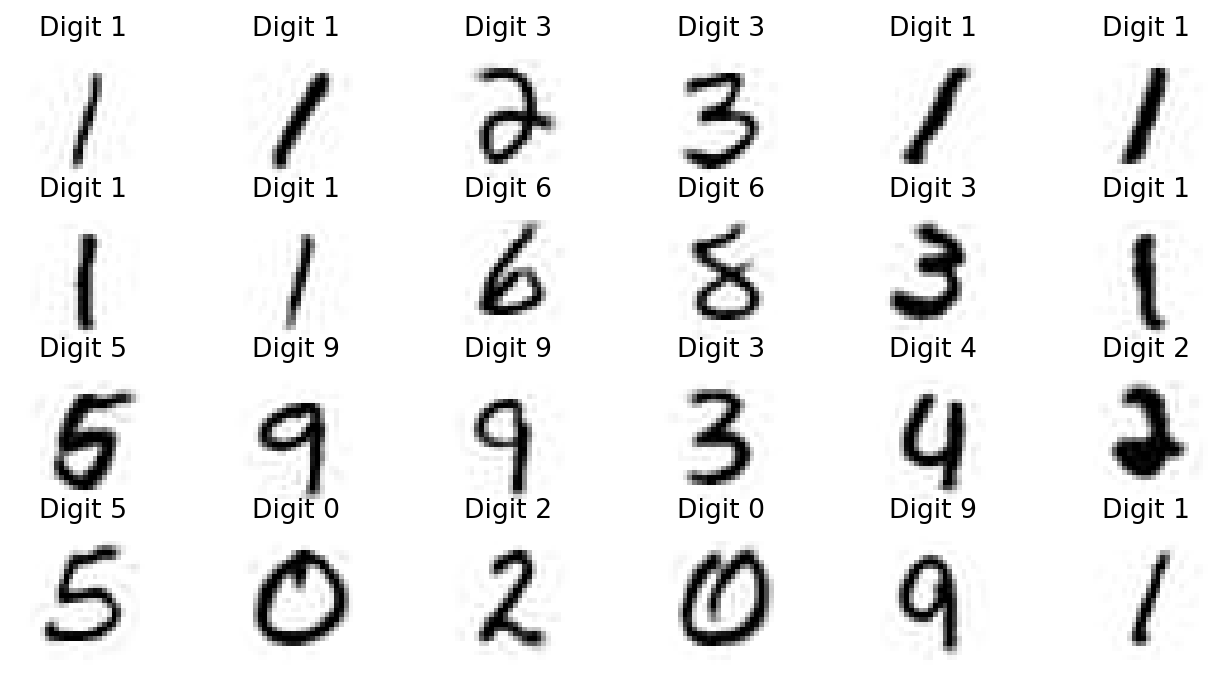

In [6]:
predict = clf.predict(X_test)
pcs = scaler.inverse_transform(X_test)
imgs = pca.inverse_transform(pcs)
imgs = np.clip(imgs, 0, 255)

show_some_digits(imgs, predict)